# Tuning practice (SVM / RF / XGBoost) - Regression (PRSA data)

### Attribute Information: (PASA_data)

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

pm2.5: PM2.5 concentration (ug/m^3)

DEWP: Dew Point (â„ƒ)

TEMP: Temperature (â„ƒ)

PRES: Pressure (hPa)

cbwd: Combined wind direction

Iws: Cumulated wind speed (m/s)

Is: Cumulated hours of snow

Ir: Cumulated hours of rain

## EDA and Data preprocessing

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows',None)

In [7]:
df=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [8]:
df.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [9]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [10]:
df2=df.dropna() #remove the rows contain any NA.

In [11]:
df2.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


In [12]:
df2=df2.reset_index()
df2.head()

,index,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [13]:
type(df2['cbwd'][0])

str

In [14]:
df2.info() #one categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   41757 non-null  int64  
 1   No      41757 non-null  int64  
 2   year    41757 non-null  int64  
 3   month   41757 non-null  int64  
 4   day     41757 non-null  int64  
 5   hour    41757 non-null  int64  
 6   pm2.5   41757 non-null  float64
 7   DEWP    41757 non-null  int64  
 8   TEMP    41757 non-null  float64
 9   PRES    41757 non-null  float64
 10  cbwd    41757 non-null  object 
 11  Iws     41757 non-null  float64
 12  Is      41757 non-null  int64  
 13  Ir      41757 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 4.5+ MB


In [15]:
cbwd_cat = pd.get_dummies(df2['cbwd'])
cbwd_cat.head() #change the categorical variable to dummy variables

,NE,NW,SE,cv
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [16]:
df2 = pd.concat([df2,cbwd_cat],axis=1) #concatenate
df2.head()

,index,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
0,24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
1,25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
2,26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
3,27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
4,28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0


In [17]:
quant_cols=['DEWP','TEMP','PRES','Iws','Is','Ir','pm2.5'] #select quantitative variables
qual_cols=['month','hour','NE','NW','SE','cv'] #select categorical data

In [18]:
corr_df=pd.DataFrame(np.corrcoef(np.array(df2[quant_cols]).T))

In [19]:
corr_df.columns=quant_cols

In [20]:
corr_df.index = quant_cols

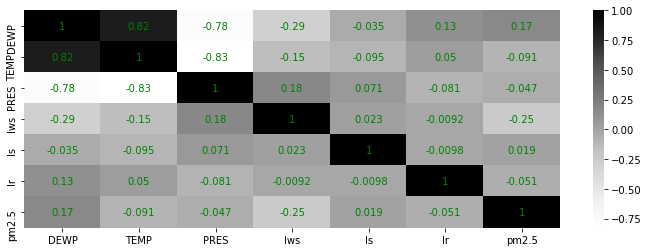

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [22]:
corr_df['pm2.5'] #correlation with pm2.5

DEWP     0.171423
TEMP    -0.090534
PRES    -0.047282
Iws     -0.247784
Is       0.019266
Ir      -0.051369
pm2.5    1.000000
Name: pm2.5, dtype: float64

<AxesSubplot:xlabel='month', ylabel='pm2.5'>

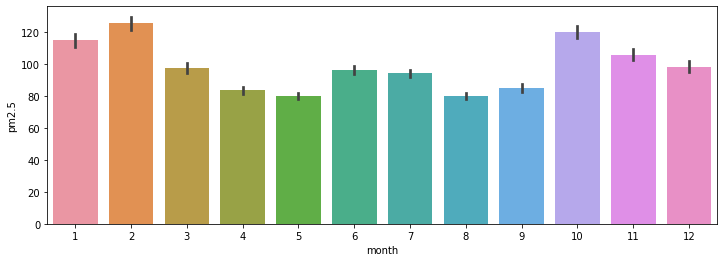

In [23]:
sns.barplot(x='month', y='pm2.5', data=df2)

<AxesSubplot:xlabel='hour', ylabel='pm2.5'>

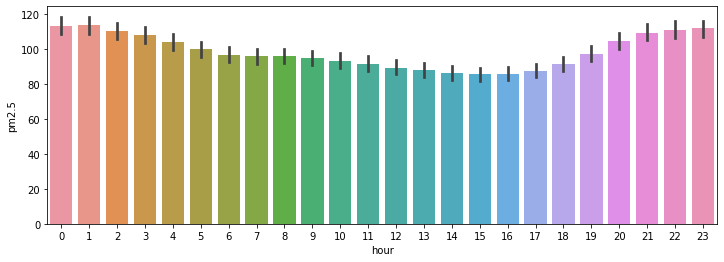

In [24]:
sns.barplot(x='hour', y='pm2.5', data=df2)

<AxesSubplot:xlabel='cbwd', ylabel='pm2.5'>

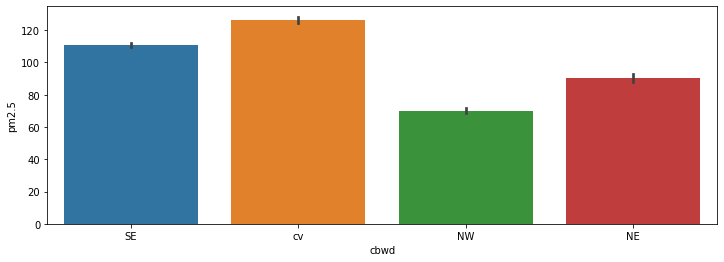

In [25]:
sns.barplot(x='cbwd', y='pm2.5', data=df2)

# Modeling

In [26]:
cols = quant_cols+qual_cols
cols.remove('pm2.5')
X,y = np.array(df2[cols]), np.array(df2["pm2.5"])

In [27]:
X[0:2,:]

array([[-1.60e+01, -4.00e+00,  1.02e+03,  1.79e+00,  0.00e+00,  0.00e+00,
         1.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  1.00e+00,  0.00e+00],
       [-1.50e+01, -4.00e+00,  1.02e+03,  2.68e+00,  0.00e+00,  0.00e+00,
         1.00e+00,  1.00e+00,  0.00e+00,  0.00e+00,  1.00e+00,  0.00e+00]])

In [28]:
X.shape

(41757, 12)

In [29]:
np.random.seed(1)
train_idx=np.random.choice(41757,31757,replace=False)
test_idx = np.array(list(set(range(41757))-set(train_idx))) #Take 10000 samples as the test set.

In [30]:
X_train = X[train_idx,]
y_train = y[train_idx,]

X_test = X[test_idx,]
y_test = y[test_idx,]

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31757, 12)
(10000, 12)
(31757,)
(10000,)


## 0. Base (mean of y_train)

In [32]:
np.sqrt(np.mean((y_test-np.mean(y_train))**2)) #base (y_mean)

93.37689990778144

## 1. OLS

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
ols_regr = LinearRegression()
ols_regr.fit(X_train,y_train)

LinearRegression()

In [35]:
ols_pred = ols_regr.predict(X_test)

In [36]:
ols_pred[ols_pred<0,]=0
ols_pred

array([ 43.44065755, 178.57921986,  67.07205565, ..., 131.9691329 ,
        56.35336049,  40.32194833])

In [37]:
np.sqrt(np.mean((y_test-ols_pred)**2))

79.23636933768617

In [38]:
ols_regr.coef_

array([  4.40215676,  -6.58870573,  -1.61106348,  -0.20029049,
        -4.12796092,  -6.32214068,  -1.15246671,   1.32612634,
       -11.72228683, -14.11758984,  13.0342684 ,  12.80560827])

## 2. RandomForest

In [39]:
from sklearn.ensemble import RandomForestRegressor
import time

In [40]:
rf_regr = RandomForestRegressor(n_estimators=500, criterion='mse', max_features=4, n_jobs=-1, random_state=0)

In [41]:
start=time.time()
rf_regr.fit(X_train,y_train)
print(time.time()-start) #one implementation, about 4 seconds

3.7087039947509766


In [42]:
rf_pred = rf_regr.predict(X_test)

In [43]:
rf_pred[rf_pred<0,]=0
rf_pred

array([ 32.594, 180.072,  18.088, ..., 175.024,  36.154,  25.918])

In [44]:
np.sqrt(np.mean((y_test-rf_pred)**2))

54.91833675909555

In [57]:
# 튜닝

param_grid = {'n_estimators':[500,1000,1500,2000],
             'max_features':[2,4,6,8,10,12]}

In [58]:
expected_time = 4*6*5*4
print(expected_time/60) #8mins

8.0


In [59]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf_regr,param_grid,cv=5,scoring='neg_root_mean_squared_error') 

In [43]:
grid_search.fit(X_train,y_train) # it may take 8 mins.

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=4, n_estimators=500,
                                             n_jobs=-1, random_state=0),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [500, 1000, 1500, 2000]},
             scoring='neg_root_mean_squared_error')

In [45]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 2000}

In [46]:
grid_search.best_score_

-54.367712944460585

In [47]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head(5))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.136935,0.671684,0.185203,0.017644,2,500,"{'max_features': 2, 'n_estimators': 500}",-59.259871,-58.038878,-60.189908,-59.472687,-58.940318,-59.180333,0.703074,24
1,5.581183,0.131750,0.414960,0.012543,2,1000,"{'max_features': 2, 'n_estimators': 1000}",-59.127964,-58.012705,-60.117883,-59.408901,-58.844824,-59.102455,0.689867,23
2,9.062448,0.618605,0.988230,0.092258,2,1500,"{'max_features': 2, 'n_estimators': 1500}",-59.102795,-57.969256,-60.130077,-59.341624,-58.863323,-59.081415,0.700331,22
3,13.130590,0.220587,1.395756,0.016570,2,2000,"{'max_features': 2, 'n_estimators': 2000}",-59.073619,-57.982308,-60.122460,-59.322955,-58.881232,-59.076515,0.691399,21
4,3.873661,0.192800,0.184726,0.010964,4,500,"{'max_features': 4, 'n_estimators': 500}",-56.417897,-55.196058,-57.473388,-56.882318,-56.328091,-56.459550,0.751270,20


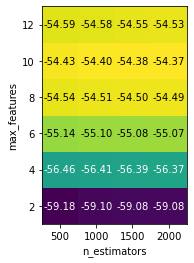

In [50]:
import mglearn

scores=np.array(results.mean_test_score).reshape(6,4)

mglearn.tools.heatmap(scores,xlabel='n_estimators', xticklabels=param_grid['n_estimators'], ylabel='max_features',yticklabels=param_grid['max_features'],cmap='viridis')

In [51]:
rft_pred = grid_search.predict(X_test)

In [52]:
rft_pred[rft_pred<0,]=0
rft_pred

array([ 41.407 , 214.9665,  18.566 , ..., 206.4885,  32.243 ,  25.8585])

In [53]:
np.sqrt(np.mean((y_test-rft_pred)**2))

52.94212291306083

## 3. SVM (RBF kernel)

In [45]:
from sklearn.svm import SVR

In [46]:
#Implement normalization for svm
Xn_train = X_train-np.min(X_train,axis=0)
Xn_train = Xn_train/(np.max(X_train,axis=0)-np.min(X_train,axis=0))

Xn_test = X_test-np.min(X_train,axis=0)
Xn_test = Xn_test/(np.max(X_train,axis=0)-np.min(X_train,axis=0))

In [47]:
svm_regr = SVR(kernel='rbf',C=2**-3, gamma=2**3)

In [48]:
start=time.time()
svm_regr.fit(Xn_train,y_train)
print(time.time()-start) #one implementation, about 67 seconds... 

65.77397871017456


In [49]:
start=time.time()
svm_pred = svm_regr.predict(Xn_test) 
print(time.time()-start) #inference is also demanding, about 32 seconds...

32.71571135520935


In [50]:
svm_pred[svm_pred<0,]=0
svm_pred

array([55.38548456, 85.88205656, 63.85062897, ..., 77.50121515,
       55.14311824, 53.71417643])

In [51]:
np.sqrt(np.mean((y_test-svm_pred)**2))

92.92957249195852

In [61]:
# 튜닝

expc_list = [6,7,8] #[7,8,9]
expg_list = [4,5,6] #[4.5,5,5.5]

param_grid = {'C':[2**i for i in expc_list],
             'gamma':[2**i for i in expg_list]} #coarse tuning -> fine tuning

In [62]:
param_grid

{'C': [256], 'gamma': [32]}

In [63]:
param_grid_visual = {'C':list(np.round(np.array([2**i for i in expc_list]),3)),
             'gamma':list(np.round(np.array([2**i for i in expg_list]),3))} #for visualization later

In [64]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm_regr,param_grid,cv=2,scoring='neg_root_mean_squared_error',n_jobs=3)

In [ ]:
start=time.time()
grid_search.fit(Xn_train,y_train)
print(time.time()-start) #1 case, about 6 mins.(4-fold) / 3 mins. (2-fold)

In [67]:
984/60 #16mins, 9cases

16.4

In [94]:
3074/60 #51mins, 9cases

51.233333333333334

In [81]:
4039/60 #about 67 mins, 16cases

67.31666666666666

In [95]:
grid_search.best_params_

{'C': 256, 'gamma': 32}

In [96]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head(5))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,18.226644,0.210193,25.351784,0.013205,64,16,"{'C': 64, 'gamma': 16}",-64.276424,-66.908181,-65.592303,1.315879,8
1,28.128401,0.240574,25.310337,0.006334,64,32,"{'C': 64, 'gamma': 32}",-64.104630,-66.133478,-65.119054,1.014424,6
2,61.884523,0.695489,25.510480,0.126039,64,64,"{'C': 64, 'gamma': 64}",-64.948414,-67.155527,-66.051971,1.103557,9
3,22.419153,0.127370,25.600353,0.137293,128,16,"{'C': 128, 'gamma': 16}",-63.292985,-65.637437,-64.465211,1.172226,4
4,60.944162,0.545285,25.694700,0.243199,128,32,"{'C': 128, 'gamma': 32}",-63.052257,-65.228872,-64.140564,1.088308,3


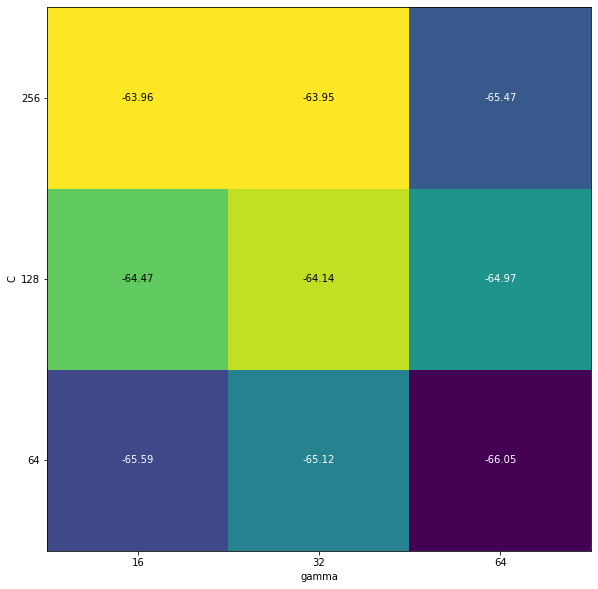

In [98]:
import mglearn

%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

scores=np.array(results.mean_test_score).reshape(3,3)

mglearn.tools.heatmap(scores,xlabel='gamma', xticklabels=param_grid_visual['gamma'], ylabel='C',yticklabels=param_grid_visual['C'],cmap='viridis')

In [99]:
svmt_pred = grid_search.predict(Xn_test)

In [100]:
svmt_pred[svmt_pred<0,]=0
svmt_pred

array([ 28.0676002 , 176.60775937,   6.16797583, ..., 162.50374364,
         8.92021937,  26.67184123])

In [101]:
np.sqrt(np.mean((y_test-svmt_pred)**2))

59.19070489548761

## 4. XGBoost

In [79]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics   #Additional scklearn functions

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [80]:
print(xgb.__version__)

1.3.3


In [81]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50): #find the best n_estimators
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #print the best n_estimators
    #print(cvresult)
    print("n_estimators:", cvresult.shape[0])

In [82]:
import xgboost as xgb 
from xgboost.sklearn import XGBRegressor
xgb_regr = xgb.XGBRegressor( #just arbitrary xgboost
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    seed=1
    )

In [83]:
#make new format of train set for xgboost
train=df2.iloc[train_idx,]
train.reset_index(drop=True,inplace=True)
print(train.head())

   index     No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd  \
0    631    632  2010      1   27     7  140.0   -11  -4.0  1015.0   NW   
1  11516  11517  2011      4   25    20   93.0     7  14.0  1003.0   SE   
2  42226  42227  2014     10   26    10   10.0    -8  15.0  1027.0   NE   
3  29825  29826  2013      5   27    17   86.0    15  23.0  1005.0   NW   
4   7882   7883  2010     11   25    10   80.0   -12   0.0  1027.0   NW   

     Iws  Is  Ir  NE  NW  SE  cv  
0  18.79   0   0   0   1   0   0  
1  33.98   0   0   0   0   1   0  
2  28.16   0   0   1   0   0   0  
3   1.79   0   0   0   1   0   0  
4   5.37   0   0   0   1   0   0  


In [84]:
#make new format of test set for xgboost
test=df2.iloc[test_idx,]
test.reset_index(drop=True,inplace=True)
print(test.head())

   index     No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd  \
0  34717  34718  2013     12   17    13   24.0   -19   1.0  1033.0   NE   
1     33     34  2010      1    2     9  132.0    -7  -5.0  1025.0   SE   
2  34726  34727  2013     12   17    22   13.0   -21  -4.0  1037.0   NE   
3  34729  34730  2013     12   18     1   12.0   -21  -6.0  1037.0   NE   
4     38     39  2010      1    2    14  158.0    -9  -5.0  1025.0   SE   

     Iws  Is  Ir  NE  NW  SE  cv  
0   3.13   0   0   1   0   0   0  
1  14.30   0   0   0   0   1   0  
2  33.08   0   0   1   0   0   0  
3  46.94   0   0   1   0   0   0  
4  31.73   0   0   0   0   1   0  


In [85]:
target = 'pm2.5'
predictors = cols

In [86]:
xgb_regr.fit(train[predictors],train[target])
xgb_pred=xgb_regr.predict(test[predictors])

In [87]:
np.sqrt(np.mean((y_test-xgb_pred)**2)) #not tuned xgboost

56.91627766681695

In [88]:
# find the best n_estimators given other parameters are fixed
modelfit(xgb_regr,train,predictors) 

n_estimators: 767


In [89]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1_regr = xgb.XGBRegressor(
    learning_rate=0.5,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    seed=1
    )

In [90]:
modelfit(xgb1_regr,train,predictors) 

n_estimators: 100


In [91]:
from sklearn.model_selection import GridSearchCV
param_test1={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,8,2)
}

gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=767, max_depth=5, min_child_weight=1,
                                              gamma=0, subsample=0.8, colsample_bytree=0.8,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test1, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [92]:
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_ 

/Users/minsoo/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


({'max_depth': 7, 'min_child_weight': 3}, -57.34036922013056)

In [93]:
from sklearn.model_selection import GridSearchCV
param_test2={
    'min_child_weight':[1,3,5,7,9,11,13,15,17,19,21]
}

gsearch2 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=767, max_depth=7, min_child_weight=3,
                                              gamma=0, subsample=0.8, colsample_bytree=0.8,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test2, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [94]:
gsearch2.fit(train[predictors],train[target])
gsearch2.best_params_, gsearch2.best_score_

({'min_child_weight': 3}, -57.34036922013056)

In [95]:
param_test3={
    'gamma':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
}

gsearch3 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=767, max_depth=7, min_child_weight=3,
                                              gamma=0, subsample=0.8, colsample_bytree=0.8,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test3, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [96]:
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.7}, -57.289658991149835)

In [97]:
xgb2_regr = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=7,
    min_child_weight=3,
    gamma=0.7,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    seed=1
    )

modelfit(xgb2_regr, train, predictors)

n_estimators: 336


In [98]:
param_test4 = {
    'subsample': [0.6,0.7,0.8,0.9],  #[i/10.0 for i in range(6,10)],
    'colsample_bytree': [0.6,0.7,0.8,0.9]  #[1/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=336, max_depth=7, min_child_weight=3,
                                              gamma=0.7, subsample=0.8, colsample_bytree=0.8,
                                              objective='reg:squarederror', nthread=3, scale_pos_weight=1, seed=1),
                       param_grid = param_test4, scoring='neg_root_mean_squared_error', n_jobs=3, cv=5)

In [99]:
gsearch4.fit(train[predictors],train[target])
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.9}, -56.67277907820975)

In [100]:
xgbt_regr = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=336,
    max_depth=7,
    min_child_weight=3,
    gamma=0.7,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    seed=1
    )

In [102]:
xgbt_regr.fit(train[predictors],train[target])
xgbt_pred=xgbt_regr.predict(test[predictors])

In [103]:
np.sqrt(np.mean((y_test-xgbt_pred)**2)) #tuned xgboost

55.477932892842254